In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import re

In [2]:
df = pd.read_csv("real_estate_dataset.csv")

In [3]:
def extract_avg_sqft(value):
    match = re.findall(r'\d+', str(value))
    if len(match) == 1:
        return float(match[0])
    elif len(match) == 2:
        return (float(match[0]) + float(match[1])) / 2
    else:
        return None

df['size_clean'] = df['size'].apply(extract_avg_sqft)

In [4]:
features = ['beds', 'baths', 'size_clean', 'price']
df_pca = df[features].dropna()

In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pca)

In [6]:
pca = PCA(n_components=3)
pca_components = pca.fit_transform(scaled_data)

In [7]:
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

Explained Variance Ratio:
[0.45795748 0.28201824 0.21239065]


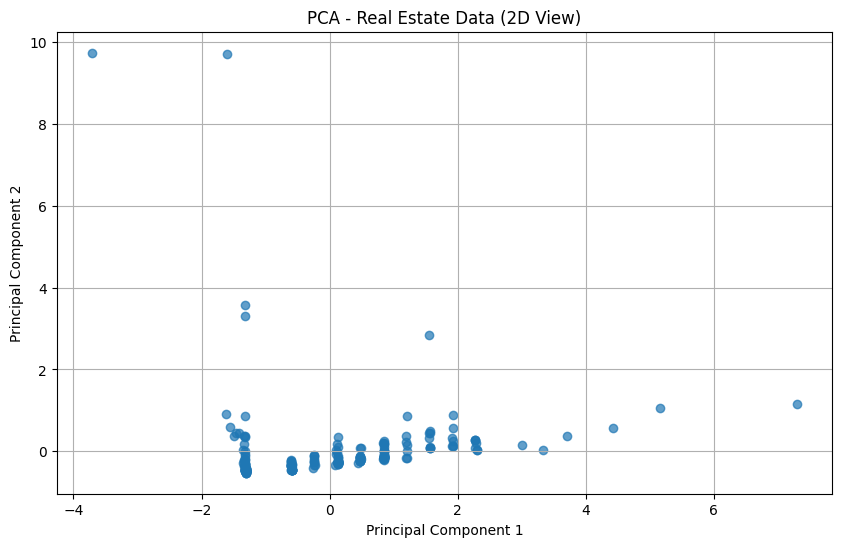

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], alpha=0.7)
plt.title("PCA - Real Estate Data (2D View)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

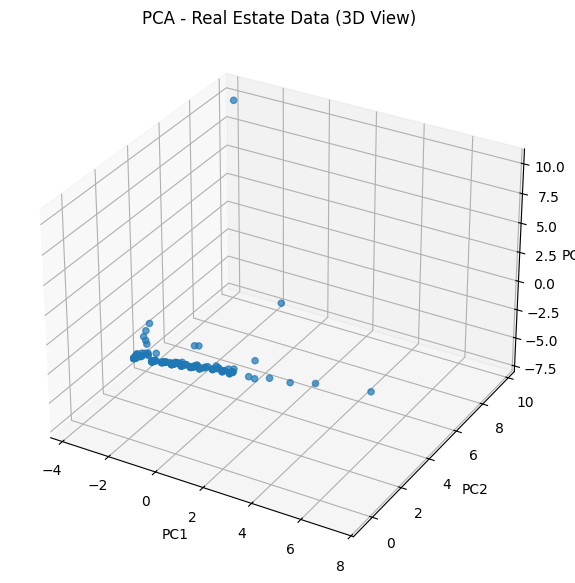

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_components[:, 0], pca_components[:, 1], pca_components[:, 2], alpha=0.7)
ax.set_title("PCA - Real Estate Data (3D View)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()